In [1]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
#import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [5]:
daily_Data= pd.read_csv("D:\\AI-DS Internship\\Internship Project\\Data\\raw_wheat.csv")

In [6]:
daily_Data.head(2)

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal_Price,Price_Date
0,1,Bhatinda,Bathinda,Wheat,Other,FAQ,1120,1125,1120,30 Apr 11
1,2,Bhatinda,Bathinda,Wheat,Other,FAQ,1120,1125,1120,29 Apr 11


In [7]:
daily_Data.shape

(1999, 10)

In [8]:
df=daily_Data.copy()

In [9]:
df.columns

Index(['Sl no.', 'District Name', 'Market Name', 'Commodity', 'Variety',
       'Grade', 'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)',
       'Modal_Price', 'Price_Date'],
      dtype='object')

In [10]:
df=df.rename(index=str, columns={"Sl no.": "Sl_no", "Min Price (Rs./Quintal)": "Min_Price","Price Date":"Price_Date","Modal Price (Rs./Quintal)":"Modal_Price"})

In [11]:
df.head()

,Sl_no,District Name,Market Name,Commodity,Variety,Grade,Min_Price,Max Price (Rs./Quintal),Modal_Price,Price_Date
0,1,Bhatinda,Bathinda,Wheat,Other,FAQ,1120,1125,1120,30 Apr 11
1,2,Bhatinda,Bathinda,Wheat,Other,FAQ,1120,1125,1120,29 Apr 11
2,3,Bhatinda,Bathinda,Wheat,Other,FAQ,1100,1100,1100,29 Apr 10
3,4,Bhatinda,Bathinda,Wheat,Other,FAQ,1100,1100,1100,28 Apr 10
4,5,Bhatinda,Bathinda,Wheat,Other,FAQ,1120,1120,1120,27 Apr 11


In [12]:
df.columns

Index(['Sl_no', 'District Name', 'Market Name', 'Commodity', 'Variety',
       'Grade', 'Min_Price', 'Max Price (Rs./Quintal)', 'Modal_Price',
       'Price_Date'],
      dtype='object')

In [13]:
df.Price_Date = pd.to_datetime(df.Price_Date, errors='coerce')

C:\Users\vedant\AppData\Local\Temp\ipykernel_10956\3297959535.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.Price_Date = pd.to_datetime(df.Price_Date, errors='coerce')


In [14]:
df.head()

,Sl_no,District Name,Market Name,Commodity,Variety,Grade,Min_Price,Max Price (Rs./Quintal),Modal_Price,Price_Date
0,1,Bhatinda,Bathinda,Wheat,Other,FAQ,1120,1125,1120,2011-04-30
1,2,Bhatinda,Bathinda,Wheat,Other,FAQ,1120,1125,1120,2011-04-29
2,3,Bhatinda,Bathinda,Wheat,Other,FAQ,1100,1100,1100,2010-04-29
3,4,Bhatinda,Bathinda,Wheat,Other,FAQ,1100,1100,1100,2010-04-28
4,5,Bhatinda,Bathinda,Wheat,Other,FAQ,1120,1120,1120,2011-04-27


In [15]:
df=df.sort_values(by='Price_Date')

In [16]:
df.drop_duplicates('Price_Date', inplace = True)

In [17]:
df.head(20)

,Sl_no,District Name,Market Name,Commodity,Variety,Grade,Min_Price,Max Price (Rs./Quintal),Modal_Price,Price_Date
34,35,Bhatinda,Bathinda,Wheat,Other,FAQ,1100,1100,1100,2010-04-06
33,34,Bhatinda,Bathinda,Wheat,Other,FAQ,1100,1100,1100,2010-04-07
31,32,Bhatinda,Bathinda,Wheat,Other,FAQ,1100,1100,1100,2010-04-08
30,31,Bhatinda,Bathinda,Wheat,Other,FAQ,1100,1100,1100,2010-04-09
1644,1645,Bhatinda,Sangat,Wheat,Other,FAQ,1100,1100,1100,2010-04-10
962,963,Bhatinda,Rampura Phul,Wheat,Other,FAQ,1100,1100,1100,2010-04-11
960,961,Bhatinda,Rampura Phul,Wheat,Other,FAQ,1100,1100,1100,2010-04-12
1618,1619,Bhatinda,Sangat,Wheat,Other,FAQ,1100,1100,1100,2010-04-13
1064,1065,Bhatinda,Rampuraphul(Bhai Rupan),Wheat,Other,FAQ,1100,1100,1100,2010-04-14
1061,1062,Bhatinda,Rampuraphul(Bhai Rupan),Wheat,Other,FAQ,1100,1100,1100,2010-04-15


In [18]:
# Future Prediction

import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [19]:
fields = ['Modal_Price', 'Price_Date']
df= pd.read_csv("D:\\AI-DS Internship\\Internship Project\\Data\\wheat.csv",skipinitialspace=True, usecols=fields)

In [20]:
df.Price_Date = pd.to_datetime(df.Price_Date, errors='coerce')


In [21]:
df=df.set_index('Price_Date')

In [22]:
df.head(2)

,Modal_Price
Price_Date,
2010-04-06,1100
2010-04-07,1100


In [23]:
data = df.copy()
y = data

In [24]:
y

,Modal_Price
Price_Date,
2010-04-06,1100
2010-04-07,1100
2010-04-08,1100
2010-04-09,1100
2010-04-10,1100
...,...
2017-05-06,1625
2017-05-09,1625
2017-05-10,1625


In [25]:
# The 'MS' string groups the data in buckets by start of the month
y = y['Modal_Price'].resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())

print(y)

Price_Date
2010-04-01    1100.0
2010-05-01    1100.0
2010-06-01    1110.0
2010-07-01    1100.0
2010-08-01    1700.0
               ...  
2017-01-01    1625.0
2017-02-01    1625.0
2017-03-01    1625.0
2017-04-01    1625.0
2017-05-01    1625.0
Freq: MS, Name: Modal_Price, Length: 86, dtype: float64


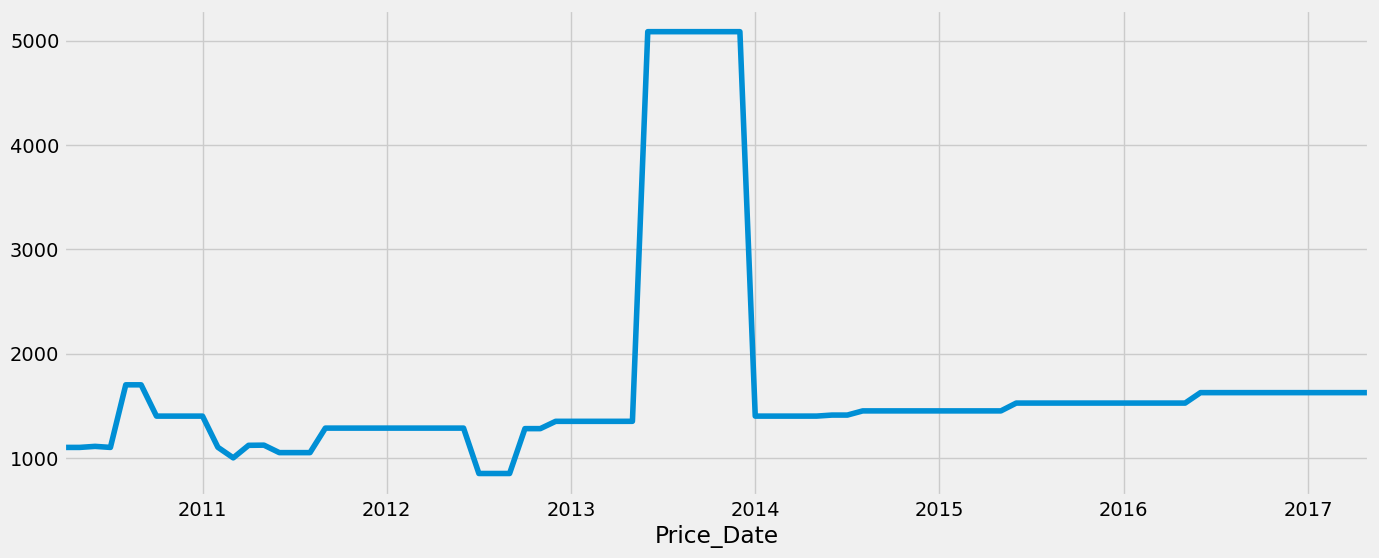

In [26]:
y.plot(figsize=(15, 6))
plt.show()

In [27]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [28]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1533.758971632188
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1303.076781772549
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1293.297991345883
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1061.0000887958481
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1299.7836076632495
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1263.038857773794
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1091.4892066734997
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1062.8230839573796
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1437.7804822098092
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1224.3374419792472
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1223.5501507104505
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1003.5714953140321
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1242.3884573134374
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1198.6128531033678
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1048.4019040394055
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1005.4470254464447
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1310.231304627329
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1135.00272581954

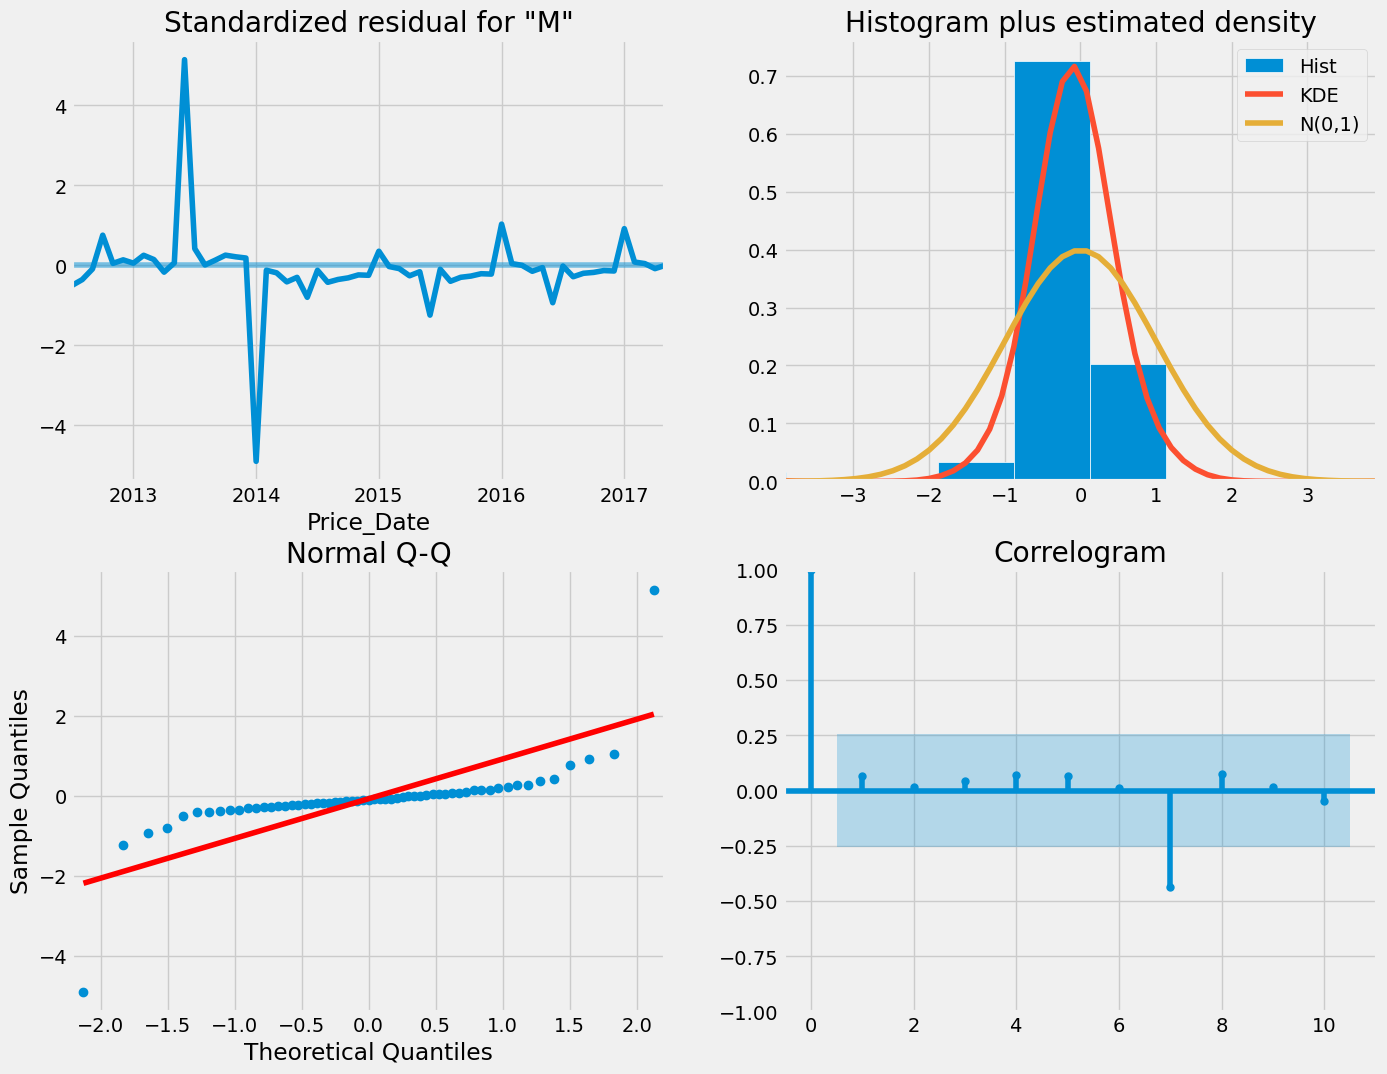

In [29]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [30]:
pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()

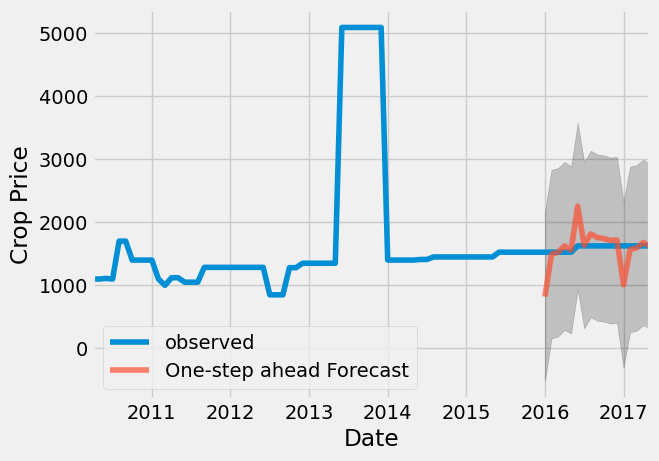

In [31]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Crop Price')
plt.legend()

plt.show()

In [32]:
y_forecasted = pred.predicted_mean
y_truth = y['2016-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 80633.78


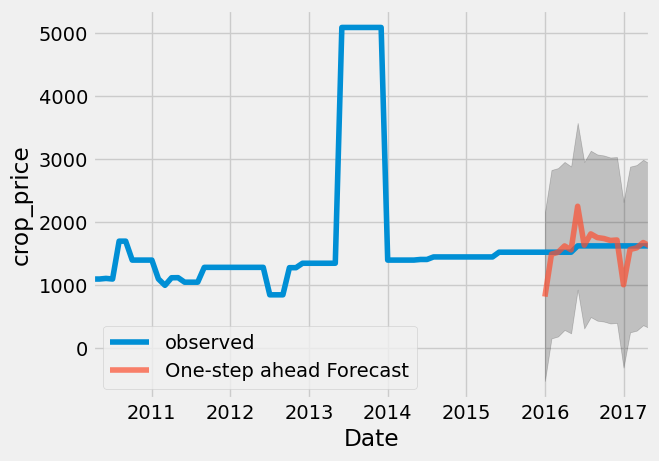

In [33]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('crop_price')
plt.legend()

plt.show()

In [34]:
y_forecasted = pred.predicted_mean
y_truth = y['2016-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 80633.78


In [35]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

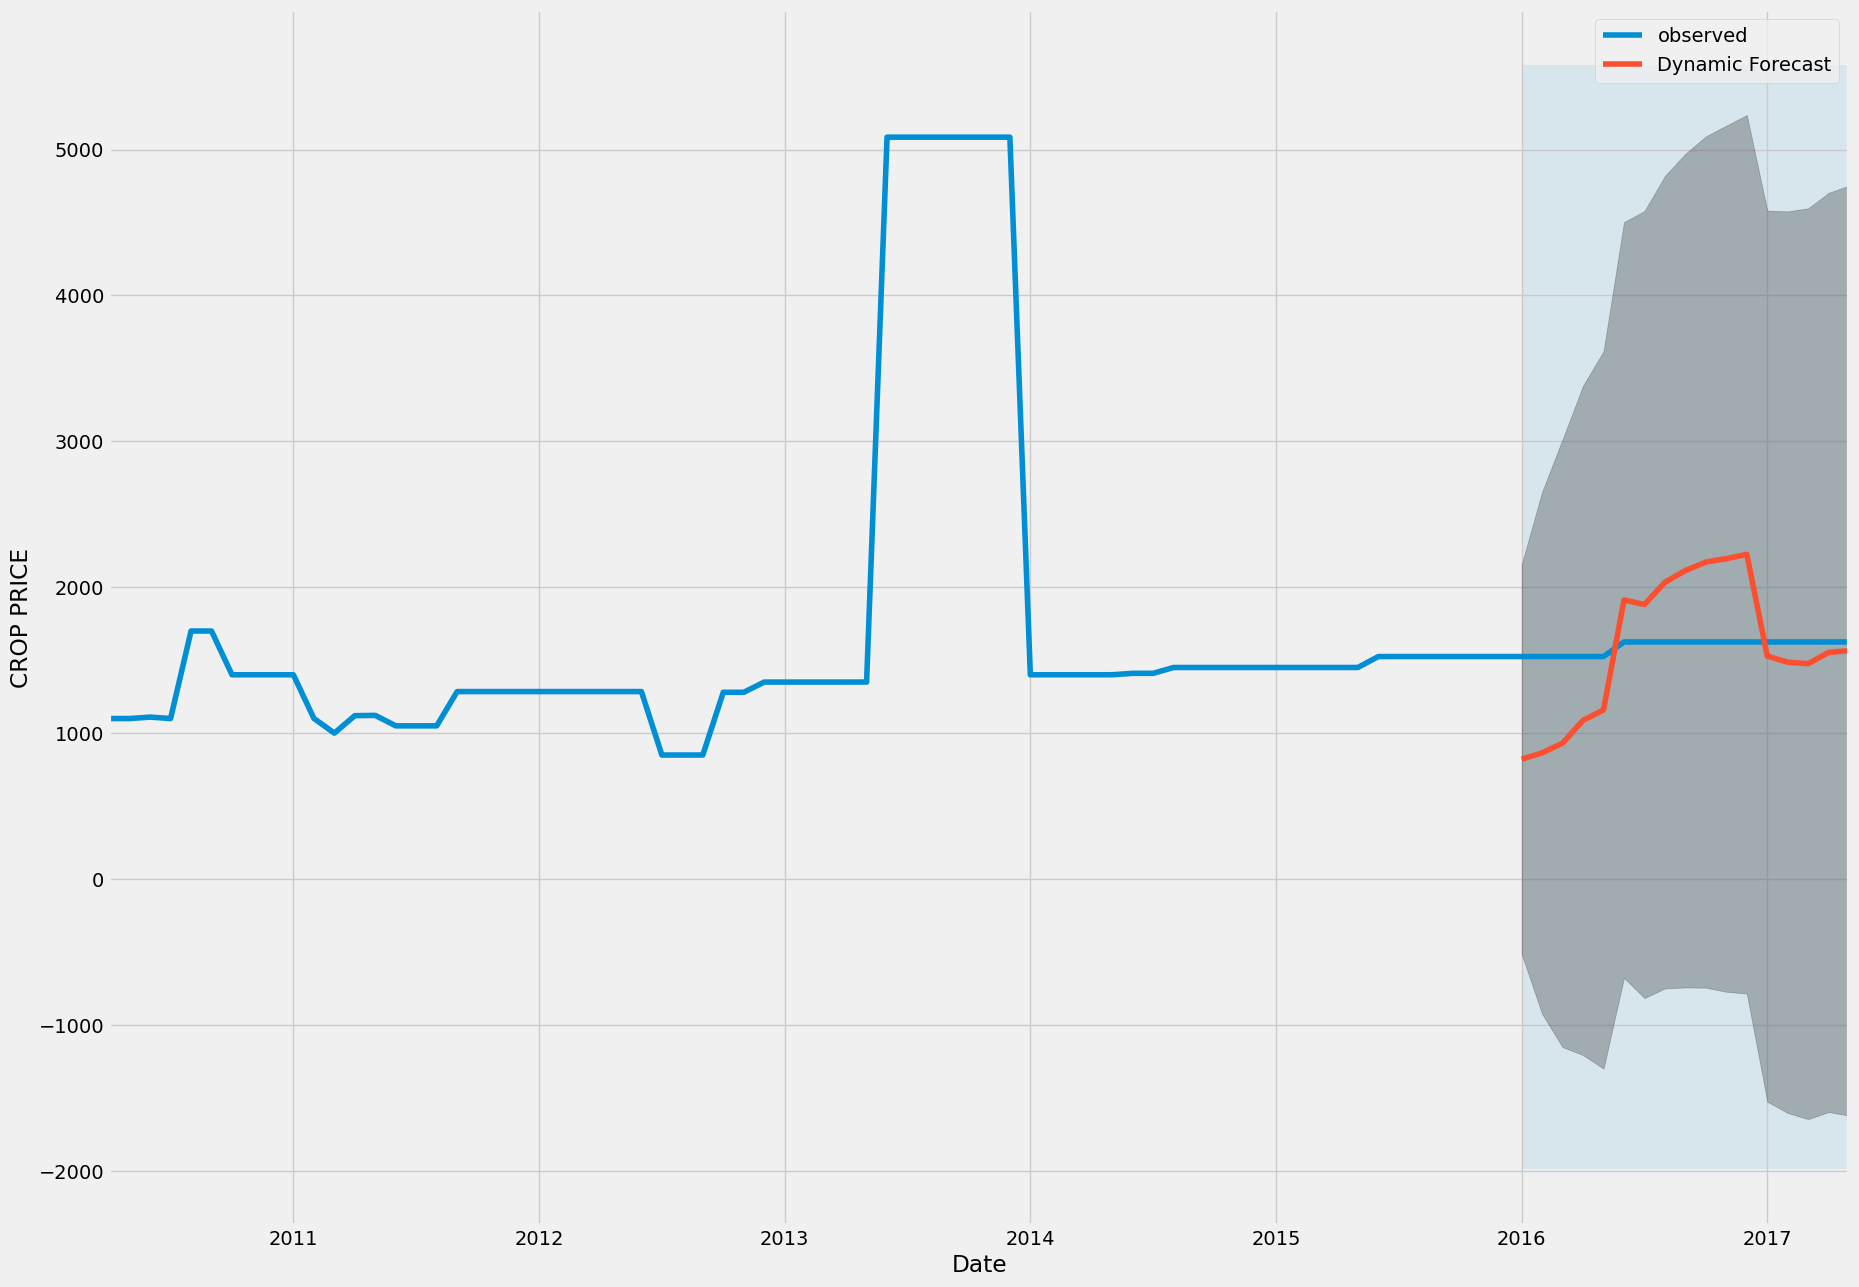

In [36]:
ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2016-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CROP PRICE')

plt.legend()
plt.show()

In [37]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2016-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 188869.47


In [38]:
# Get forecast 20 steps ahead in future
pred_uc = results.get_forecast(steps=20)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

In [39]:
pred_ci

,lower Modal_Price,upper Modal_Price
2017-06-01,927.261268,3531.694941
2017-07-01,413.513791,3900.509079
2017-08-01,222.206421,4277.307275
2017-09-01,56.185906,4514.778752
2017-10-01,-71.886661,4687.286599
2017-11-01,-191.040865,4798.722593
2017-12-01,-275.219009,4895.128525
2018-01-01,-947.451714,4366.608037
2018-02-01,-1056.163865,4373.911679
2018-03-01,-1126.536108,4398.709972


In [40]:
pred_ci.to_csv("D:\\AI-DS Internship\\Internship Project\\Data\\wheat.csv")

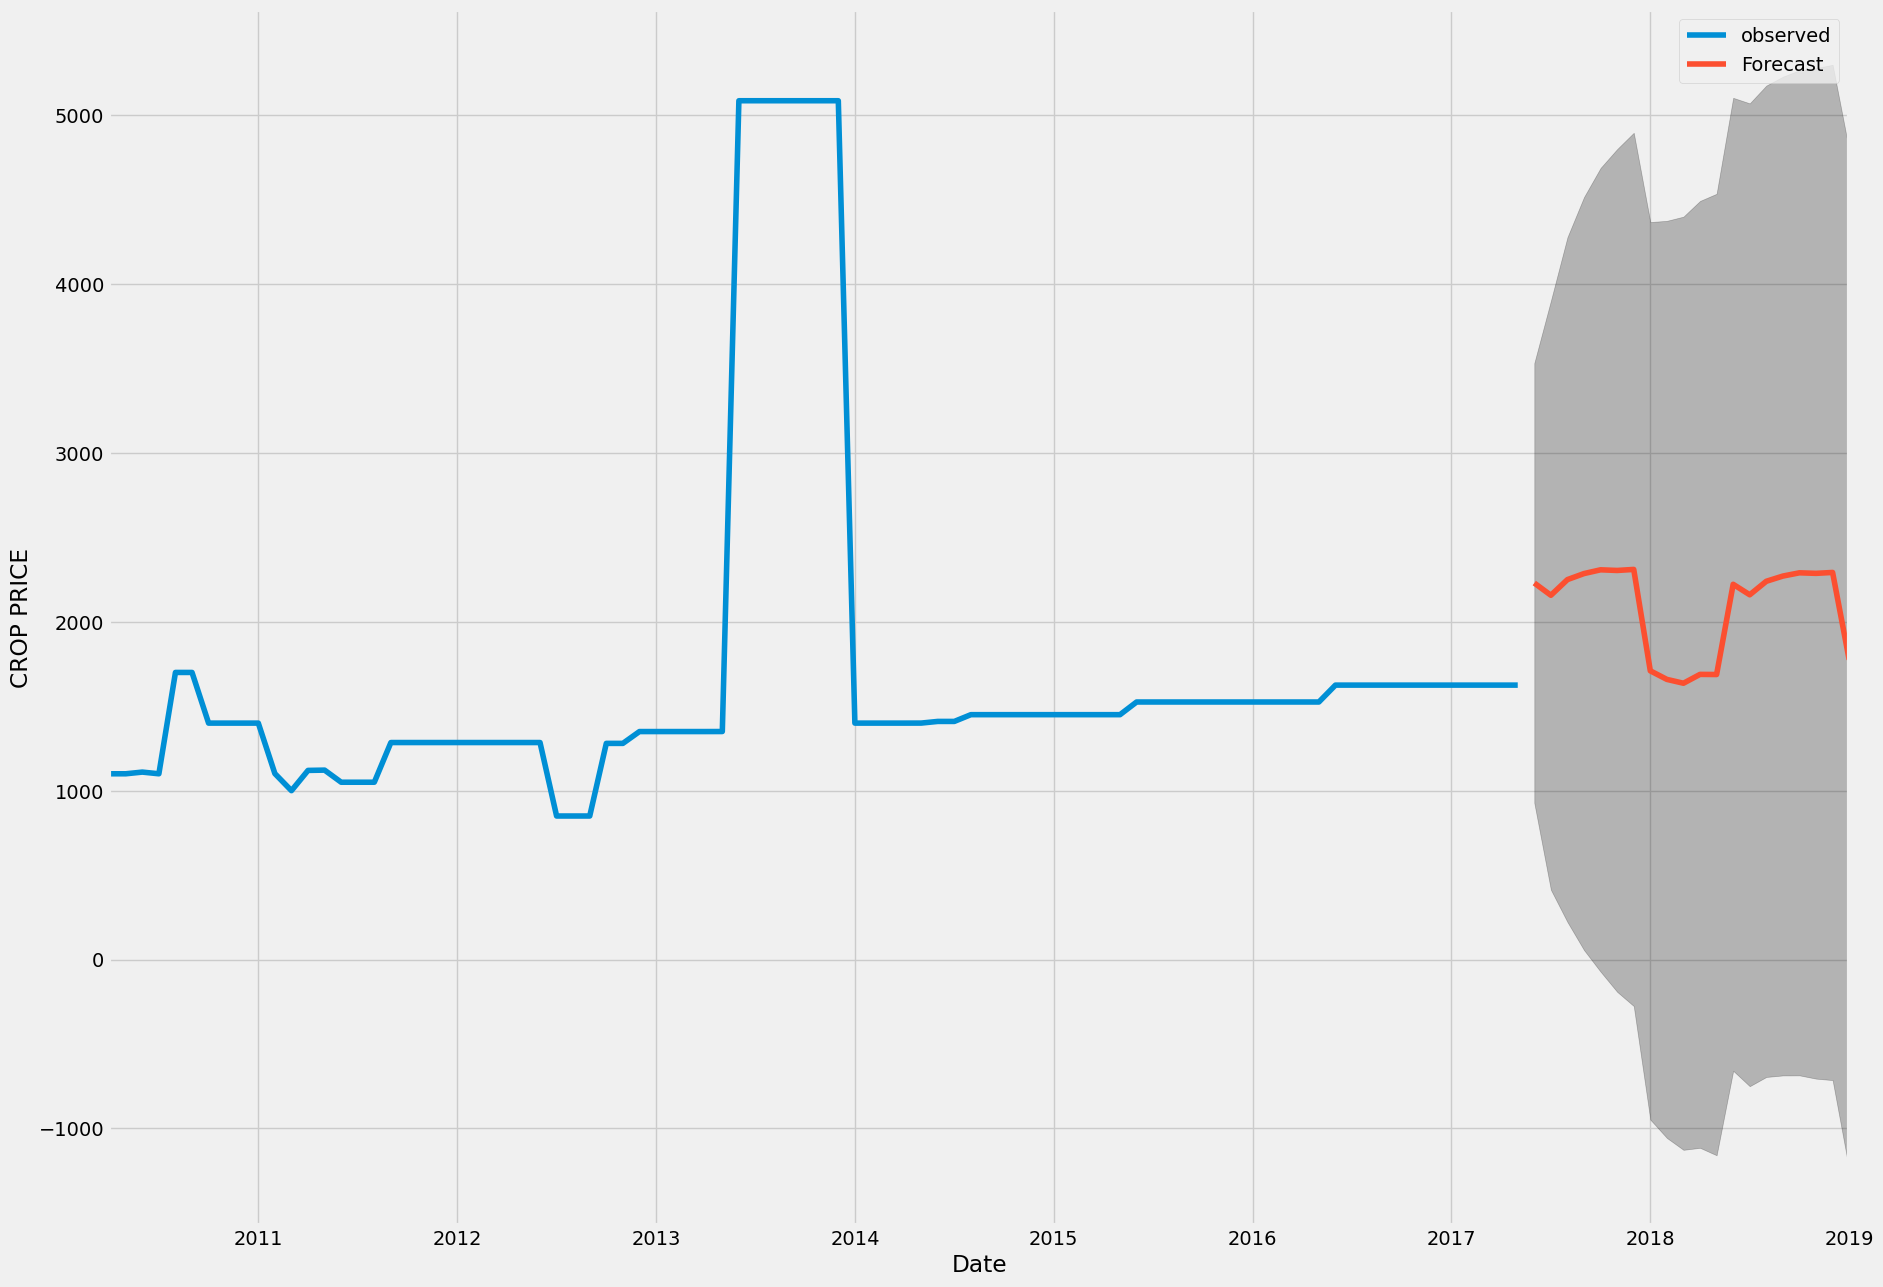

In [41]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CROP PRICE')

plt.legend()
plt.show()